 # FPV drone spectrum analyze

In [1]:
SAMPLING_FREQUENCY = 48000

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

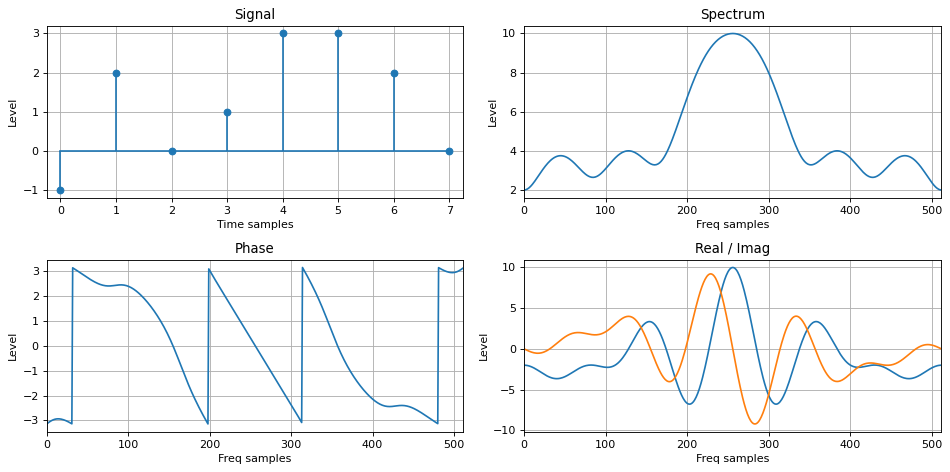

In [10]:
# signal
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])

# Z-form:
# X(z) = 1 + 2z^(-1)+z^(-3), where z = exp(-jwT)

# Forward FFT
N = 512

xFFT = fftshift(fft(x, N))
# xFFT = fft(x, N)
# Magnitude spectrum
xA = np.abs(xFFT)
# Phase spectrum
xF = np.angle(xFFT)

# Complex
xReal = np.real(xFFT)
xImag = np.imag(xFFT)

# List of signals
xT = [x, xA, xF, np.array([xReal, xImag]).T]
lst_title = ['Signal', 'Spectrum', 'Phase', 'Real / Imag']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, i+1)
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, basefmt='C0')
        plt.xlabel('Time samples')
        plt.xlim([-0.25, len(x)-0.75])
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()